In [2]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

# Scarico dati mensili dell'indice small cap (Russell 2000)
r2k = yf.download(
    "^RUT", start="2010-01-01", end="2024-12-31", interval="1mo", auto_adjust=True
)
r2k["return"] = r2k["Close"].pct_change()

# Aggiungo colonna mese e dummy per gennaio
r2k["month"] = r2k.index.month
r2k["D_jan"] = (r2k["month"] == 1).astype(int)

# Modello: rendimento ~ dummy gennaio
X = sm.add_constant(r2k["D_jan"])
y = r2k["return"]
model = sm.OLS(y, X, missing="drop").fit()
print(model.summary())

[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01654
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.898
Time:                        13:33:32   Log-Likelihood:                 258.49
No. Observations:                 179   AIC:                            -513.0
Df Residuals:                     177   BIC:                            -506.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.046      0.0

[*********************100%***********************]  1 of 1 completed


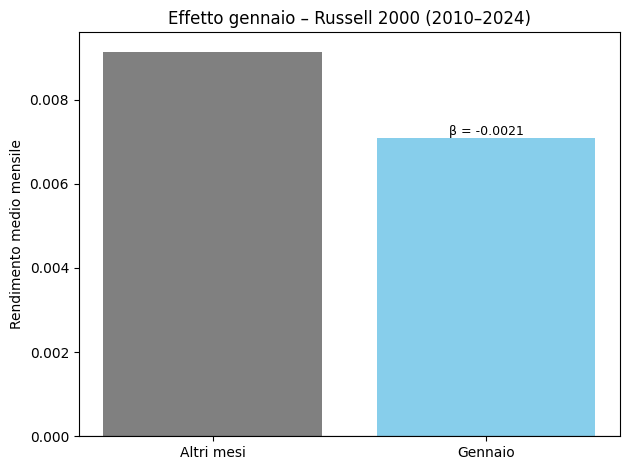

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01654
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.898
Time:                        13:33:49   Log-Likelihood:                 258.49
No. Observations:                 179   AIC:                            -513.0
Df Residuals:                     177   BIC:                            -506.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.046      0.0

In [3]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Scarica dati mensili del Russell 2000
r2k = yf.download(
    "^RUT", start="2010-01-01", end="2024-12-31", interval="1mo", auto_adjust=True
)
r2k["return"] = r2k["Close"].pct_change()

# Dummy per gennaio
r2k["month"] = r2k.index.month
r2k["D_jan"] = (r2k["month"] == 1).astype(int)

# Regressione: rendimento ~ dummy gennaio
X = sm.add_constant(r2k["D_jan"])
y = r2k["return"]
model = sm.OLS(y, X, missing="drop").fit()

# Medie empiriche
mean_jan = r2k.loc[r2k["D_jan"] == 1, "return"].mean()
mean_others = r2k.loc[r2k["D_jan"] == 0, "return"].mean()

# Grafico
plt.bar(["Altri mesi", "Gennaio"], [mean_others, mean_jan], color=["gray", "skyblue"])
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Effetto gennaio – Russell 2000 (2010–2024)")
plt.ylabel("Rendimento medio mensile")
plt.text(
    1,
    mean_jan,
    f"β = {model.params['D_jan']:.4f}",
    ha="center",
    va="bottom",
    fontsize=9,
)
plt.tight_layout()
plt.show()

print(model.summary())